<h1 align=center style="line-height:200%;color:#0099cc">
Student GPA Prediction
</h1>

<p style="text-align: justify; line-height:200%; font-size:medium">
In this question, we intend to estimate the students' Grade Point Average (GPA) using a dataset that includes student information. To do this, after preprocessing the data, you must engage in feature engineering and build an appropriate model. Note that, in the end, only your model will be evaluated, but naturally, the better your preprocessing and feature engineering, the better model you will ultimately achieve.

</p>

<h2 style="line-height:200%;color:#0099cc">
Dataset Introduction
</h2>

<p style="text-align: justify; line-height:200%; font-size:medium">
    In the initial file for this question, there is a folder named <code>data</code>.
    This folder includes two files named <code>train.csv</code> and <code>test.csv</code>, which are the training and test datasets, respectively.
    The training dataset for this question includes 1913 rows and 14 columns, and
        the test dataset has 479 rows and is missing only the <code>GPA</code> column.
    The descriptions of the columns are as follows:
</p>

<center>
<div style="line-height:200%;font-size:medium">

| <b>Feature Name</b> | <b>Feature Description</b> |
| :---: | :---: |
| <code>StudentID</code> | Student ID|
| <code>Age</code> | Individual's Age|
| <code>Gender</code> | Gender, 0 for males and 1 for females|
| <code>Ethnicity</code> | Students' Ethnicity|
| <code>ParentalEducation</code> | Student's family education level|
| <code>StudyTimeWeekly</code> | Weekly study hours from 0 to 20 hours|
| <code>Absences</code> | Number of student absences in one academic year from 0 to 30|
| <code>Tutoring</code> | Tutoring status, 0 indicating no and 1 indicating yes|
| <code>ParentalSupport</code> | Level of parental support for the student|
| <code>Extracurricular</code> | Participation in extracurricular activities, 0 indicating no and 1 indicating yes|
| <code>Sports</code> | Participation in sports programs, 0 indicating no and 1 indicating yes||
| <code>Music</code> | Participation in music programs, 0 indicating no and 1 indicating yes||
| <code>Volunteering</code> | Participation in volunteering programs, 0 indicating no and 1 indicating yes||
| <code>GPA</code> | Grade Point Average in the range of zero to four|


<p style="text-align: justify; line-height:500%; font-size:medium">
<font color="red" size=3><b>Note:</b></font>
<font size=3>
The evaluation data may contain missing values (NaN).
</font>
</p>
</div>
</center>

<h2 style="line-height:200%;color:#0099cc">
Reading the Dataset
</h2>

<p style="text-align: justify; line-height:200%; font-size:medium">
    Initially, you need to read the dataset files. The training samples are saved in the <code>train.csv</code> file, and the test samples, for which you must predict the value of the target variable, are saved in the <code>test.csv</code> file. If you deem it necessary, you can optionally separate a portion of the training set as a validation set.
</p>

In [7]:
import pandas as pd
import numpy as np
import seaborn as sns

In [103]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')
train

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA
0,1643,18,1,Caucasian,Higher,18.118879,24,1,NaN,1,1,0,0,1.396278
1,2753,16,1,Other,Some College,2.469271,19,0,Low,0,0,0,1,0.754751
2,2402,17,0,Asian,Bachelor,3.456401,25,0,NaN,0,0,0,0,0.136166
3,3033,17,1,Caucasian,High School,15.838131,25,1,Moderate,0,0,0,0,1.172192
4,1991,16,0,Caucasian,NaN,1.045373,19,1,Moderate,0,0,1,0,1.747356
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1908,2639,15,0,African American,NaN,13.092424,13,1,Low,0,0,0,0,1.595627
1909,2096,16,0,Caucasian,Some College,2.159249,19,0,Very High,0,1,0,0,1.523945
1910,2131,16,1,Caucasian,Some College,3.572578,14,1,Moderate,1,1,0,0,2.051919
1911,2295,18,0,Other,Some College,4.402585,20,0,High,0,0,0,0,1.348997


<h2 style="line-height:200%;color:#0099cc">
Preprocessing and Feature Engineering
</h2>

<p style="text-align: justify; line-height:200%; font-size:medium">
        In this question, you are free to use any preprocessing/feature engineering technique of your choice.
    <br>
    The techniques you use will <b>not</b> be directly evaluated by the judging system. Instead, they will all affect your model's accuracy; therefore, the better your preprocessing/feature engineering to improve the model's accuracy, the higher score you will achieve for this question.

</p>

<Axes: >

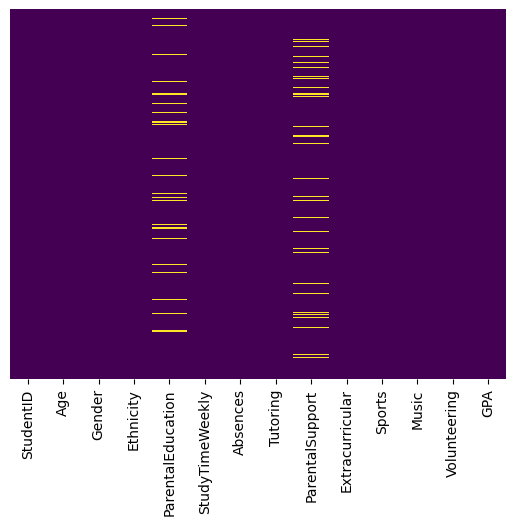

In [58]:
sns.heatmap(train.isnull(),yticklabels=False, cbar=False,cmap='viridis')

In [11]:
train.describe()

,StudentID,Age,Gender,StudyTimeWeekly,Absences,Tutoring,Extracurricular,Sports,Music,Volunteering,GPA
count,1913.000000,1913.000000,1913.000000,1913.000000,1913.000000,1913.000000,1913.000000,1913.000000,1913.000000,1913.000000,1913.000000
mean,2195.642446,16.456351,0.514375,9.748506,14.618400,0.302143,0.380031,0.304757,0.198118,0.156299,1.901119
std,687.474019,1.124705,0.499924,5.702764,8.485326,0.459307,0.485521,0.460425,0.398686,0.363234,0.916532
min,1001.000000,15.000000,0.000000,0.008031,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1613.000000,15.000000,0.000000,4.958649,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.162574
50%,2189.000000,16.000000,1.000000,9.518844,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.886543
75%,2787.000000,17.000000,1.000000,14.407464,22.000000,1.000000,1.000000,1.000000,0.000000,0.000000,2.621623
max,3392.000000,18.000000,1.000000,19.968425,29.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000


<Axes: xlabel='GPA', ylabel='Count'>

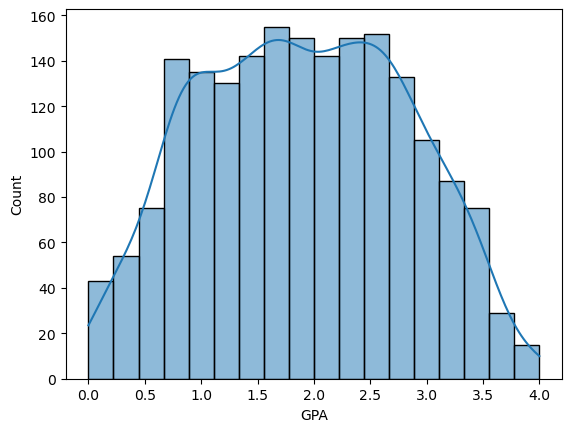

In [23]:
sns.histplot(data=train,x='GPA',kde=True)

In [104]:
train.drop('StudentID',axis=1,inplace=True)
train

,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA
0,18,1,Caucasian,Higher,18.118879,24,1,NaN,1,1,0,0,1.396278
1,16,1,Other,Some College,2.469271,19,0,Low,0,0,0,1,0.754751
2,17,0,Asian,Bachelor,3.456401,25,0,NaN,0,0,0,0,0.136166
3,17,1,Caucasian,High School,15.838131,25,1,Moderate,0,0,0,0,1.172192
4,16,0,Caucasian,NaN,1.045373,19,1,Moderate,0,0,1,0,1.747356
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1908,15,0,African American,NaN,13.092424,13,1,Low,0,0,0,0,1.595627
1909,16,0,Caucasian,Some College,2.159249,19,0,Very High,0,1,0,0,1.523945
1910,16,1,Caucasian,Some College,3.572578,14,1,Moderate,1,1,0,0,2.051919
1911,18,0,Other,Some College,4.402585,20,0,High,0,0,0,0,1.348997


<Axes: xlabel='Sports', ylabel='GPA'>

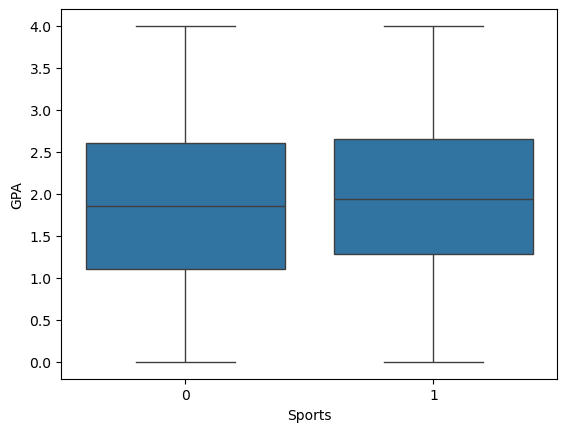

In [41]:
sns.boxplot(data=train,y='GPA',x='Sports')

<Axes: xlabel='Music', ylabel='GPA'>

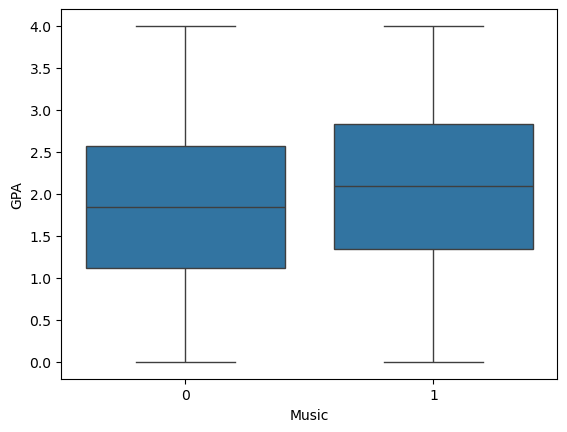

In [42]:
sns.boxplot(data=train,y='GPA',x='Music')

<Axes: xlabel='Extracurricular', ylabel='GPA'>

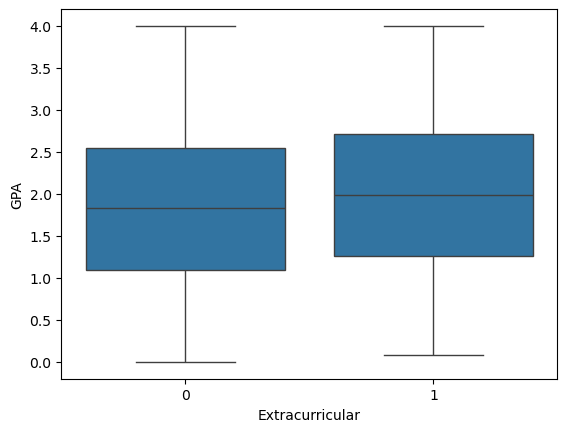

In [43]:
sns.boxplot(data=train,y='GPA',x='Extracurricular')

<Axes: xlabel='Volunteering', ylabel='GPA'>

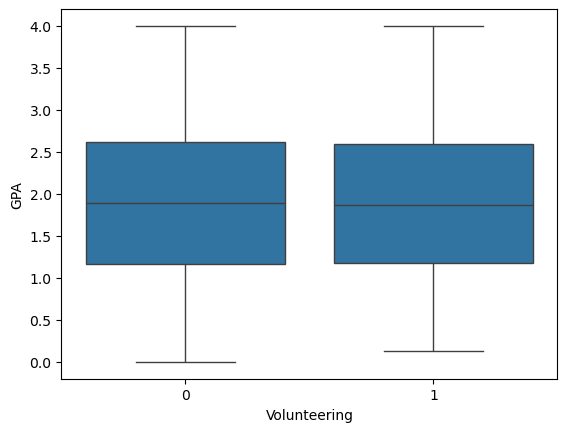

In [44]:
sns.boxplot(data=train,y='GPA',x='Volunteering')

In [ ]:
# noticeable differences in all 4 boxplots so can't drop any of the 4 features

In [45]:
#handling missing values 

In [105]:
pemode=train['ParentalEducation'].mode()[0]
psmode=train['ParentalSupport'].mode()[0]
train['ParentalEducation'].fillna(pemode,inplace=True)
train['ParentalSupport'].fillna(psmode,inplace=True)
print(train[['ParentalEducation','ParentalSupport']].isnull().sum())

ParentalEducation    0
ParentalSupport      0
dtype: int64


/tmp/ipykernel_18507/3783068356.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train['ParentalEducation'].fillna(pemode,inplace=True)
/tmp/ipykernel_18507/3783068356.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True

In [86]:
train

,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA
0,18,1,Caucasian,Higher,18.118879,24,1,Moderate,1,1,0,0,1.396278
1,16,1,Other,Some College,2.469271,19,0,Low,0,0,0,1,0.754751
2,17,0,Asian,Bachelor,3.456401,25,0,Moderate,0,0,0,0,0.136166
3,17,1,Caucasian,High School,15.838131,25,1,Moderate,0,0,0,0,1.172192
4,16,0,Caucasian,Some College,1.045373,19,1,Moderate,0,0,1,0,1.747356
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1908,15,0,African American,Some College,13.092424,13,1,Low,0,0,0,0,1.595627
1909,16,0,Caucasian,Some College,2.159249,19,0,Very High,0,1,0,0,1.523945
1910,16,1,Caucasian,Some College,3.572578,14,1,Moderate,1,1,0,0,2.051919
1911,18,0,Other,Some College,4.402585,20,0,High,0,0,0,0,1.348997


In [106]:
train=pd.get_dummies(train,columns=['Ethnicity'],drop_first=True) 

In [107]:
train.head()

,Age,Gender,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,Ethnicity_Asian,Ethnicity_Caucasian,Ethnicity_Other
0,18,1,Higher,18.118879,24,1,Moderate,1,1,0,0,1.396278,False,True,False
1,16,1,Some College,2.469271,19,0,Low,0,0,0,1,0.754751,False,False,True
2,17,0,Bachelor,3.456401,25,0,Moderate,0,0,0,0,0.136166,True,False,False
3,17,1,High School,15.838131,25,1,Moderate,0,0,0,0,1.172192,False,True,False
4,16,0,Some College,1.045373,19,1,Moderate,0,0,1,0,1.747356,False,True,False


In [108]:
train['ParentalEducation']=train['ParentalEducation'].str.strip() # not able to map properly since maybe ParEdu entries contained leading or trailing spaces, so cleaned those spaces
paredumap={'High School': 0,'Some College':1,'Bachelor':2,'Higher':3}
train['ParentalEducation']=train['ParentalEducation'].map(paredumap)
train

,Age,Gender,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,Ethnicity_Asian,Ethnicity_Caucasian,Ethnicity_Other
0,18,1,3,18.118879,24,1,Moderate,1,1,0,0,1.396278,False,True,False
1,16,1,1,2.469271,19,0,Low,0,0,0,1,0.754751,False,False,True
2,17,0,2,3.456401,25,0,Moderate,0,0,0,0,0.136166,True,False,False
3,17,1,0,15.838131,25,1,Moderate,0,0,0,0,1.172192,False,True,False
4,16,0,1,1.045373,19,1,Moderate,0,0,1,0,1.747356,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1908,15,0,1,13.092424,13,1,Low,0,0,0,0,1.595627,False,False,False
1909,16,0,1,2.159249,19,0,Very High,0,1,0,0,1.523945,False,True,False
1910,16,1,1,3.572578,14,1,Moderate,1,1,0,0,2.051919,False,True,False
1911,18,0,1,4.402585,20,0,High,0,0,0,0,1.348997,False,False,True


In [109]:
parsupmap={'Low':0,'Moderate':1,'High':2,'Very High':3}
train['ParentalSupport']=train['ParentalSupport'].str.strip()
train['ParentalSupport']=train['ParentalSupport'].map(parsupmap)

#### 
<h2 style="line-height:200%;color:#0099cc">
Model Training
</h2>

<p style="text-align: justify;line-height:200%;font-size:medium">
    Now that you have cleaned the data and perhaps added or removed features, it is time to train a model that can predict the target variable for this problem.
</p>

In [168]:
y=train['GPA']
x=train.drop('GPA',axis=1)
from sklearn.ensemble import RandomForestRegressor
mymodel=RandomForestRegressor(
    max_depth=10,          # Limits how deep each tree can be
    min_samples_leaf=5,    # Requires more samples to form a prediction
    random_state=42
)
from sklearn.model_selection import train_test_split
x_train,x_val,y_train,y_val=train_test_split(x,y,test_size=479,random_state=42) #taking a validation set of 479 rows for finding r2 score with testdata
mymodel.fit(x_train,y_train)

RandomForestRegressor(max_depth=10, min_samples_leaf=5, random_state=42)

In [169]:
ypred=mymodel.predict(x_val)
ytrainpred=mymodel.predict(x_train)

<h2 style="line-height:200%;color:#0099cc">
Evaluation Metric
</h2>

<p style="text-align: justify; line-height:200%; font-size:medium">
    The metric we have chosen to evaluate the model's performance is called <code>r2_score</code>.
    <br>
    This metric is the quality assessment measure for your model. In other words, the judging system also uses this exact metric for scoring.
    <br>
    It is suggested that you evaluate your model's performance on the training or validation set based on this metric.
</p>

<p style="text-align: justify; line-height:200%; font-size:medium">
<b style="color:red;">Note:</b>
    To receive a score for this question, your model's accuracy must be greater than the threshold of 0.4.
    If your model's accuracy is less than 0.4, your score will be 
    <b>zero</b>
    , otherwise, it will be calculated with the following formula:
</p>


In [170]:
from sklearn.metrics import r2_score
r2val=r2_score(y_val,ypred)
r2train=r2_score(y_train,ytrainpred)
r2val

0.9242352245227778

In [171]:
r2train

0.9574626784032206

<h2 style="line-height:200%;color:#0099cc">
Prediction on Test Data and Output
</h2>

<p style="text-align: justify;line-height:200%;font-size:medium">
    Save your model's predictions on the test data in a dataframe (<code>dataframe</code>) with the following format.
</p>


<p style="text-align: justify;line-height:200%;font-size:medium">
    Note that the dataframe name must be <code>submission</code>; otherwise, the judging system will not be able to evaluate your output.
    This dataframe contains only 1 column named <code>GPA</code> and has 479 rows.
    <br>
    For each row in the test dataset, you must have one predicted value.
    For example, the table below shows the first 5 rows of the <code>submission</code> dataframe. However, these numbers are hypothetical, and the numbers in the <code>GPA</code> column in your answer may be different.
</p>

<center>
<div style="line-height:200%;font-size:medium">
    
||<code>GPA</code>|
|:----:|:-----:|
|0|2.6765|
|1|3.9865434|
|2|1.0323434|
|3|0.0434253|
|4|2.060680|

</div>
</center>

In [131]:
test.drop('StudentID',axis=1,inplace=True)

In [133]:
pemode=test['ParentalEducation'].mode()[0]
psmode=test['ParentalSupport'].mode()[0]
test['ParentalEducation'].fillna(pemode,inplace=True)
test['ParentalSupport'].fillna(psmode,inplace=True)
print(test[['ParentalEducation','ParentalSupport']].isnull().sum())

ParentalEducation    0
ParentalSupport      0
dtype: int64


/tmp/ipykernel_18507/376070912.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test['ParentalEducation'].fillna(pemode,inplace=True)
/tmp/ipykernel_18507/376070912.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)',

In [135]:
test=pd.get_dummies(test,columns=['Ethnicity'],drop_first=True)

In [136]:
test['ParentalEducation']=test['ParentalEducation'].str.strip() # not able to map properly since maybe ParEdu entries contained leading or trailing spaces, so cleaned those spaces
paredumap_={'High School': 0,'Some College':1,'Bachelor':2,'Higher':3}
test['ParentalEducation']=test['ParentalEducation'].map(paredumap_)

In [137]:
parsupmap_={'Low':0,'Moderate':1,'High':2,'Very High':3}
test['ParentalSupport']=test['ParentalSupport'].str.strip()
test['ParentalSupport']=test['ParentalSupport'].map(parsupmap_)

In [180]:
final_pred=mymodel.predict(test)

In [183]:
submission=pd.DataFrame({'GPA': final_pred})

<h2 style="line-height:200%;color:#0099cc">
<b>Submission File Generator Cell</b>
</h2>

<p style="text-align: justify; line-height:200%;font-size:medium">
    Run the cell below to create the <code>result.zip</code> file. Note that you must save the changes made in the notebook (<code>ctrl+s</code>) before running the cell below, otherwise, your score will change to zero at the end of the contest.
    <br>
    Also, if you are using Colab to run this notebook file, download the latest version of your notebook and include it in the submission file before sending <code>result.zip</code>.
</p>

In [184]:
import zipfile
import os

if not os.path.exists(os.path.join(os.getcwd(), 'Student_GPA.ipynb')):
   
    try:
        get_ipython().run_line_magic('notebook', '-e Student_GPA.ipynb')
    except NameError:
        print("Warning: Not running in a Jupyter environment with magics enabled. Please ensure 'Student_GPA.ipynb' is saved manually.")

def compress(file_names):
    print("File Paths:")
    print(file_names)
    compression = zipfile.ZIP_DEFLATED
    with zipfile.ZipFile("result.zip", mode="w") as zf:
        for file_name in file_names:
            zf.write('./' + file_name, file_name, compress_type=compression)

submission.to_csv('submission.csv', index=False)

file_names = ['Student_GPA.ipynb', 'submission.csv']
compress(file_names)

File Paths:
['Student_GPA.ipynb', 'submission.csv']
